In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
import logging.config
logging.config.fileConfig('../logging.ini', disable_existing_loggers=False)

#hack for importing from sibling dirs
import context 

import matplotlib.pyplot as plt
%matplotlib inline

# history-of-poland (depth 10) -> ~5325 nodes
CAT_PATH = '../../wiki-graph/hist_of_poland-10h/history-of-poland-10-cats_links-en-20111201'
DICT_PATH = '../../wiki-graph/hist_of_poland-10h/history-of-poland-10-po_linkach-cats_dict-en-20111201'



In [3]:
from cat2vec.assessment.assessment_saver.local_assessment_saver import LocalAssessmentSaver
from cat2vec.assessment.embeddings_assessor import EmbeddingsAssessor, AssessmentConfig
from cat2vec.embedding.gcn.gcn import GCN

model = GCN(layers_shapes=[50, 300])
saver = LocalAssessmentSaver(cvs_path=r'C:\Users\Jan\Desktop\neural-embeddings\tmp\results.csv',
                                 dst_path=r'D:\cat2vec\gcn\results')

assessor = EmbeddingsAssessor(model=model,
                              assessment_saver=saver,
                              cat_path=CAT_PATH,
                              dict_path=DICT_PATH,
                              root_node='History_of_Poland')

assessor.fit(epochs=20000,
                 learning_rate=0.00821,
                 input_features=50,
                 regularization=0.1,
                 beta=50)


2019-06-24 00:56:21,889 - cat2vec.graph.loader - INFO - Loading graph from matrix' files: ../../wiki-graph/hist_of_poland-10h/history-of-poland-10-cats_links-en-20111201, ../../wiki-graph/hist_of_poland-10h/history-of-poland-10-po_linkach-cats_dict-en-20111201
2019-06-24 00:56:22,053 - cat2vec.graph.loader - INFO - Cleaning graph
2019-06-24 00:56:22,060 - cat2vec.graph.loader - INFO - Loaded graph with 5325 nodes and 7501 edges
2019-06-24 00:56:22,061 - cat2vec.assessment.embeddings_assessor - INFO - Training 'gcn_v1' without random walks
2019-06-24 00:56:22,062 - cat2vec.embedding.gcn.gcn - INFO - Train config: {'epochs': 20000, 'learning_rate': 0.00821, 'input_features': 50, 'regularization': 0.1, 'beta': 50, 'layers_shapes': [50, 300]}
2019-06-24 00:56:25,483 - cat2vec.utils.common - INFO - Using GloVe to initialize weights
2019-06-24 00:56:33,348 - cat2vec.utils.common - WARNING - No embedding for: 'Falangism'. Creating random embedding
2019-06-24 00:56:33,460 - cat2vec.utils.commo

[3721.0,
 7071.0,
 7179.0,
 7179.0,
 7116.0,
 7099.0,
 7057.0,
 7155.0,
 7080.0,
 7132.0,
 7152.0,
 7093.0,
 7096.0,
 7161.0,
 7071.0,
 7011.0,
 7106.0,
 7030.0,
 7072.0,
 7124.0,
 7097.0,
 7096.0,
 7104.0,
 7093.0,
 7038.0,
 7103.0,
 7022.0,
 7062.0,
 7044.0,
 7005.0,
 7092.0,
 7136.0,
 7084.0,
 6997.0,
 7091.0,
 7057.0,
 7090.0,
 7017.0,
 7040.0,
 7079.0,
 7101.0,
 7080.0,
 6981.0,
 6989.0,
 7111.0,
 7084.0,
 7079.0,
 7075.0,
 7051.0,
 7076.0,
 6971.0,
 7007.0,
 7012.0,
 7059.0,
 6997.0,
 6966.0,
 6993.0,
 7051.0,
 6979.0,
 6990.0,
 6898.0,
 6990.0,
 7013.0,
 6974.0,
 7051.0,
 6872.0,
 6988.0,
 6960.0,
 6948.0,
 6868.0,
 6943.0,
 6919.0,
 6951.0,
 6906.0,
 6914.0,
 6912.0,
 6896.0,
 6945.0,
 6947.0,
 6882.0,
 6916.0,
 6898.0,
 6923.0,
 6888.0,
 6987.0,
 6914.0,
 6753.0,
 6941.0,
 6775.0,
 6866.0,
 6913.0,
 6801.0,
 6839.0,
 6718.0,
 6872.0,
 6788.0,
 6766.0,
 6770.0,
 6825.0,
 6866.0,
 6833.0,
 6826.0,
 6857.0,
 6921.0,
 6890.0,
 6733.0,
 6854.0,
 6679.0,
 6774.0,
 6723.0,
 6806.0,
 

In [4]:
metrics = AssessmentConfig()\
    .with_edges_prediction(negative_edges_per_node=5, print_erroneous_edges=True)\
    # .with_neighbours_coverage()\
    # .with_softmax_ancestor_prediction(epochs=20, learning_rate=0.2, batch_size=128)\
    # .with_ancestor_prediction(samples_per_node=5, max_distance=2, k=5)\
    
assessor.assess_model(save_results=False, config=metrics)


2019-06-24 01:12:39,634 - cat2vec.assessment.embeddings_assessor - INFO - Assessing 'gcn_v1' using metrics: [<Metrics.EDGES_PREDICTION: 2>]
2019-06-24 01:14:09,817 - cat2vec.assessment.metrics.edges_prediction_accuracy - INFO - 	Missing edge from "Lesser_Poland" to "Lublin_Voivodeship"
2019-06-24 01:14:09,818 - cat2vec.assessment.metrics.edges_prediction_accuracy - INFO - 	Missing edge from "World_War_II_naval_ships_of_France" to "World_War_II_corvettes_of_France"
2019-06-24 01:14:09,818 - cat2vec.assessment.metrics.edges_prediction_accuracy - INFO - 	Missing edge from "Battles_and_operations_of_World_War_II_involving_New_Zealand" to "Naval_battles_of_World_War_II_involving_New_Zealand"
2019-06-24 01:14:09,819 - cat2vec.assessment.metrics.edges_prediction_accuracy - INFO - 	Missing edge from "Legal_history_of_Poland" to "Constitutions_of_Poland"
2019-06-24 01:14:09,819 - cat2vec.assessment.metrics.edges_prediction_accuracy - INFO - 	Missing edge from "Cold_War_historians" to "Vietnam_W

c:\users\jan\desktop\neural-embeddings\venv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\jan\desktop\neural-embeddings\venv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'EDGES_PREDICTION': {'AVERAGE': {'True positive': '1062 (0.28312450013329776)',
   'False negative': '2689 (0.7168754998667022)',
   'True negative': '12462 (0.9360775182152783)',
   'False positive': '851 (0.06392248178472171)',
   'Recall': 0.28312450013329776},
  'HADAMARD': {'True positive': '3106 (0.8280458544388163)',
   'False negative': '645 (0.17195414556118369)',
   'True negative': '12272 (0.9218057537745061)',
   'False positive': '1041 (0.07819424622549388)',
   'Recall': 0.8280458544388163}}}

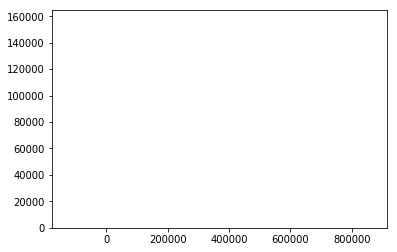

[     1      0      0      0      0      0      0      0      0      0
      1      1      0      0      0      1      1      1      2      1
      0      0      0      1      1      3      3      2      1      1
      2      3      1      2      4      1      1      1      0      2
      0      5      1      2      7      4      5      3      6      4
      6     12      4      2      8      4      9      8     13     11
     14     16     15     17     19     14     23     19     25     28
     28     26     36     35     33     44     49     56     48     63
     74     89     88    112    103    130     95    138    186    192
    204    241    254    325    372    405    479    559    645    739
    799   1012   1102   1441   1641   1842   2120   2516   2983   3579
   4356   4993   6141   7365   9088  10991  13088  16146  19566  23616
  28569  34431  43276  54379  71294  91484 121307 156598 127025  53159
  50271  47171  43619  40251  36635  33596  31072  28666  26339  24297
  2211

In [19]:
import numpy as np

W = model.get_embeddings()
hist, bin_edges = np.histogram(W, bins=1000)


plt.bar(bin_edges[:-1], hist, width = 1)
plt.show() 

print(hist)
print(*bin_edges, sep = "\n")
